# Prosper Loan Analysis
## by Pavan Gowda

## Preliminary Wrangling

> This data set contains 81 features about loan data for 113936 listings. 
For my project, my goal is to delve deep into the dataset to uncover the important factors about a Loan applicant that could determine the status of his/her loan


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Pavan\Downloads\prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
cleaned=df.copy()

### Fixing the Feature of Interest

 The Past Due portion seems to be divided by timeperiod. This may lead to too few data samples per Status type.
 So, it is best to merge them.

In [4]:
 
cleaned["LoanStatus"]=cleaned["LoanStatus"].replace({"Past Due (1-15 days)":"PastDue",
                              "Past Due (31-60 days)": "PastDue",
                                "Past Due (61-90 days)" :"PastDue",
                                "Past Due (91-120 days)":"PastDue",
                               "Past Due (>120 days)":"PastDue",
                                                    "Past Due (16-30 days)": "PastDue"})

Also, a look at the distribution shows that Cancelled and FinalPaymentInProgress are too sparse. They should be dropped.

In [30]:
cleaned["LoanStatus"].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
PastDue                    2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

In [5]:
# Find the location to be dropped
few=np.where((cleaned["LoanStatus"]=="FinalPaymentInProgress") |(cleaned["LoanStatus"]=="Cancelled") )[0]

In [192]:
# Check to see if code worked
len(few)

210

In [6]:
cleaned=cleaned.drop(few)

### Removing Features with Extremey Low Variance

In [7]:
describe=cleaned.describe()
describe

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.137270e+05,113727.000000,113702.000000,113727.000000,113727.000000,84648.000000,84648.000000,84648.000000,84648.000000,84648.000000,...,113727.000000,113727.000000,113727.000000,113727.000000,113727.000000,113727.000000,113727.000000,113727.000000,113727.000000,113727.000000
mean,6.276938e+05,40.833259,0.218809,0.192757,0.182693,0.168642,0.080299,0.096075,4.072524,5.950548,...,-54.703338,-14.260657,701.739736,682.678760,25.189113,0.998587,0.048098,0.023477,16.576696,80.484397
std,3.282063e+05,10.434871,0.080356,0.074811,0.074507,0.068456,0.046761,0.030406,1.672996,2.376221,...,60.666246,109.326521,2390.528230,2359.160321,275.910208,0.017894,0.332629,0.232570,294.814998,103.250586
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.000480e+05,36.000000,0.156290,0.134000,0.124250,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.150000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.003650e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.430000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926015e+05,36.000000,0.283700,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.905000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


After perusing the summary statistics, it is clear that some variables have the same 25 percentile as 75 percentile. This is a clear indication of low variance, which means that these features won't lead to any valuable conclusions. 

In [8]:
# Find the ones that have the same 25th and 75th percentile. 
same=[]
for column in describe.columns: 
    if describe[column]["25%"]== describe[column]["75%"]: same.append(column)


In [196]:
same


['Term',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'LoanCurrentDaysDelinquent',
 'LP_CollectionFees',
 'LP_GrossPrincipalLoss',
 'LP_NetPrincipalLoss',
 'LP_NonPrincipalRecoverypayments',
 'PercentFunded',
 'Recommendations',
 'InvestmentFromFriendsCount',
 'InvestmentFromFriendsAmount']

In [197]:
# Here you can see the value counts for the features in same. Notice that one value heavily dominates these variables. 
for i in same: 
    print(df[i].value_counts())

36    87778
60    24545
12     1614
Name: Term, dtype: int64
0.0     89742
1.0     11716
2.0      4357
3.0      2098
4.0      1379
5.0       916
6.0       690
7.0       517
8.0       397
9.0       289
10.0      212
11.0      191
12.0      147
13.0      111
15.0       83
14.0       71
16.0       58
17.0       40
18.0       37
21.0       31
19.0       28
20.0       27
22.0       21
27.0       12
24.0       12
23.0        9
26.0        8
31.0        6
25.0        5
28.0        5
32.0        5
30.0        2
36.0        2
35.0        2
41.0        2
40.0        1
39.0        1
82.0        1
64.0        1
33.0        1
50.0        1
57.0        1
83.0        1
51.0        1
45.0        1
59.0        1
37.0        1
Name: CurrentDelinquencies, dtype: int64
0.0         89818
50.0           73
100.0          67
25.0           66
30.0           65
75.0           56
60.0           46
40.0           43
120.0          35
55.0           34
65.0           34
15.0           34
67.0           32
150.0 

In [9]:
cleaned=cleaned.drop(same, axis=1)

### Fixing variable Types

In [21]:
# Find variables that are data type objects. 
objects=[]
for i in cleaned.columns: 
    if (cleaned.dtypes== "object")[i]==True: 
        objects.append(i)

In [200]:
objects

['ListingKey',
 'ListingCreationDate',
 'CreditGrade',
 'LoanStatus',
 'ClosedDate',
 'ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'GroupKey',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'IncomeRange',
 'LoanKey',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'MemberKey']

Now, i will change select variables to either categorical or datetime. An ordinal variable means that the category has an innate ranking to it while a simple categorical variables means that there is no order. 

In [10]:
ordinal= ["CreditGrade","IncomeRange","ProsperRating (Alpha)","ProsperRating (numeric)","ProsperScore"]
categorical=['LoanStatus',"BorrowerState","Occupation","EmploymentStatus","ListingCategory (numeric)"]
dates=["ListingCreationDate","ClosedDate","DateCreditPulled","FirstRecordedCreditLine","LoanOriginationDate"]

In [11]:
# Fix ordinal
for order in ordinal: 
    cleaned[order]= cleaned[order].astype("category", ordered=True)

C:\Users\Pavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Fix categorical
for column in categorical: 
    cleaned[column]= cleaned[column].astype("category", ordered=False)

C:\Users\Pavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Fix datetime
for column in dates: 
    cleaned[column]= pd.to_datetime(cleaned[column])

In [205]:
cleaned.dtypes

ListingKey                                    object
ListingNumber                                  int64
ListingCreationDate                   datetime64[ns]
CreditGrade                                 category
LoanStatus                                  category
ClosedDate                            datetime64[ns]
BorrowerAPR                                  float64
BorrowerRate                                 float64
LenderYield                                  float64
EstimatedEffectiveYield                      float64
EstimatedLoss                                float64
EstimatedReturn                              float64
ProsperRating (numeric)                     category
ProsperRating (Alpha)                       category
ProsperScore                                category
ListingCategory (numeric)                   category
BorrowerState                               category
Occupation                                  category
EmploymentStatus                            ca

### Missing Values

In [26]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113727 entries, 0 to 113936
Data columns (total 65 columns):
ListingKey                            113727 non-null object
ListingNumber                         113727 non-null int64
ListingCreationDate                   113727 non-null datetime64[ns]
CreditGrade                           28948 non-null category
LoanStatus                            113727 non-null category
ClosedDate                            55084 non-null datetime64[ns]
BorrowerAPR                           113702 non-null float64
BorrowerRate                          113727 non-null float64
LenderYield                           113727 non-null float64
EstimatedEffectiveYield               84648 non-null float64
EstimatedLoss                         84648 non-null float64
EstimatedReturn                       84648 non-null float64
ProsperRating (numeric)               84648 non-null category
ProsperRating (Alpha)                 84648 non-null category
ProsperScore 

While the missing values are not too bad, I noticed there was some patterns. EstimatedEffectiveYield  EtimatedLoss Estimated Return and the Prosper Ratings and Score each have only about 80,000 values.After review of the documentation, I realized this is because data for these features are only available after 2009. Therefore, to compensate for these missing values I decided to take all values in the dataset on or after 2009. Even though we are losing some data, we still have a very large datset. Also, the economy was very turbulent before 2009, due to a recession, so it is best to keep reletivly  recent data to account for these external factors. 

Also, the Total prosper Loans, ProsperPrincipal Borrowed, etc. have only about 20,000 values. After review of the documentation, I discovered it was because these are only for people who have previously taken a Loan with Prosper. I will drop these features in a later section of the project. 

In [14]:
# Find Creation year and keep only on or after 2009
cleaned["creation_year"]=cleaned["ListingCreationDate"].dt.year
cleaned=cleaned[cleaned["creation_year"]>=2009]

In [18]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84676 entries, 1 to 113936
Data columns (total 63 columns):
ListingKey                            84676 non-null object
ListingNumber                         84676 non-null int64
ListingCreationDate                   84676 non-null datetime64[ns]
LoanStatus                            84676 non-null category
ClosedDate                            26033 non-null datetime64[ns]
BorrowerAPR                           84676 non-null float64
BorrowerRate                          84676 non-null float64
LenderYield                           84676 non-null float64
EstimatedEffectiveYield               84648 non-null float64
EstimatedLoss                         84648 non-null float64
EstimatedReturn                       84648 non-null float64
ProsperRating (numeric)               84648 non-null category
ProsperRating (Alpha)                 84648 non-null category
ProsperScore                          84648 non-null category
ListingCategory (nume

In [15]:
# Drop features that are too low
cleaned= cleaned.drop(["CreditGrade","GroupKey","LoanFirstDefaultedCycleNumber"], axis=1)

As you can see the missing values now seem to be few and randomly placed.

## Feature Selection

For my analysis it would be unreasonable to analysis all the features as there are too many. Therefore, I will use a combination of Statistics (VIF) , basic machine learning( logistic regression), and intuition to narrow down to my top variables for further analysis.  

### Variation Infation Factor to deal with Colinearity

While analyzing the dataset it appears that some variables may not be indepednent and could convey the same meaning. Therefore, it would be best to deal with these colinearities by checking the VIFs. Also, dealing with colinearity will help increase reliability in our logistic regression. 

In [19]:
# get numerical variables and drop nulls. 
num= cleaned._get_numeric_data()
num=num.dropna()


In [20]:
num=num.reset_index().drop("index", axis=1)

In [21]:
# create intercept
num["intercept"]=1

In [22]:
for i in num.columns: 
    num[i]=num[i].astype(float)

In [23]:
# Create Vifs. I do this by running a regression to try to predict a variable by using all other variables in the datset.I then use the r2 value to calulate the VIF.
# I use a loop to repeat this for all features. 
import statsmodels.formula.api as sm
features = num.columns
feature_name=[]
vifs=[]
for i in range(len(features)): 
    y= str(features[i])
    x= np.setdiff1d(features, y)
    mod= sm.OLS(num[y],num[x])
    res=mod.fit()
    rsq=res.rsquared
    vif= round(1/(1-rsq),2)
    feature_name.append(features[i])
    vifs.append(vif)

C:\Users\Pavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Pavan\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [24]:
v= pd.DataFrame()
v["feature"]= feature_name
v["vif"]= vifs
v.head()

,feature,vif
0,ListingNumber,58.35
1,BorrowerAPR,119.03
2,BorrowerRate,116630.56
3,LenderYield,117444.08
4,EstimatedEffectiveYield,8.01


In [25]:
v[v["vif"]>10]

,feature,vif
0,ListingNumber,5.835000e+01
1,BorrowerAPR,1.190300e+02
2,BorrowerRate,1.166306e+05
3,LenderYield,1.174441e+05
5,EstimatedLoss,4.285900e+02
6,EstimatedReturn,1.662600e+02
10,CreditScoreRangeLower,inf
11,CreditScoreRangeUpper,inf
12,CurrentCreditLines,1.275000e+01
13,OpenCreditLines,1.465000e+01


As you can see there are some very large VIFs and definitly some co linearity in the dataset. I will therefore drop the following 10 features and recalcalulate. 

In [26]:
clean_drop=["ListingNumber", "LoanNumber","creation_year","CreditScoreRangeUpper", "LP_CustomerPayments","BorrowerRate","LenderYield","EstimatedLoss","OpenCreditLines","TotalProsperPaymentsBilled"]
num=num.drop(clean_drop, axis=1)

In [227]:
import statsmodels.formula.api as sm
features = num.columns
feature_name=[]
vifs=[]
for i in range(len(features)): 
    y= str(features[i])
    x= np.setdiff1d(features, y)
    mod= sm.OLS(num[y],num[x])
    res=mod.fit()
    rsq=res.rsquared
    vif= round(1/(1-rsq),2)
    feature_name.append(features[i])
    vifs.append(vif)

In [228]:
v= pd.DataFrame()
v["feature"]= feature_name
v["vif"]= vifs
v.head()

,feature,vif
0,BorrowerAPR,5.96
1,EstimatedEffectiveYield,6.35
2,EstimatedReturn,4.33
3,EmploymentStatusDuration,1.08
4,IsBorrowerHomeowner,1.39


In [229]:
v[v["vif"]>10]

,feature,vif


As you can see the VIFs are less than 10 a sign that we have decreased co linearity.

In [230]:
v

,feature,vif
0,BorrowerAPR,5.96
1,EstimatedEffectiveYield,6.35
2,EstimatedReturn,4.33
3,EmploymentStatusDuration,1.08
4,IsBorrowerHomeowner,1.39
5,CurrentlyInGroup,1.11
6,CreditScoreRangeLower,3.68
7,CurrentCreditLines,5.10
8,TotalCreditLinespast7years,8.10
9,OpenRevolvingAccounts,4.15


In [17]:
# drop the values
cleaned=cleaned.drop(clean_drop, axis=1)

### Logistic Regression

Now, we can run a run a logistic regression to help narrow down the features even more. However, it is important to note that the purpose of this regression is not to predict but to get a general sense of the  important features for Loan Status. Therefore, I have skipped some steps like splitting into train test sets. Also, while there is definity more preprocessing steps that one can do, I believe the steps taken here are sufficient to get a general understanding of the dataet to help guide our intuition. 

In [280]:
ml= cleaned.copy()

#### Preproccessing 

Before, we run the regression, we must do some initial preprocessing. First, lets drop variables that will create a major dimensionality problem and thus skew our results. 

In [281]:
# the listing category has no variation and is will cause dimensionality issues. 
ml["ListingCategory (numeric)"].value_counts()

1     53078
7      9203
2      6787
3      5287
6      2229
13     1990
15     1521
18      882
14      870
20      768
19      762
16      303
5       276
11      215
8       199
10       91
9        85
12       58
17       52
0        20
4         0
Name: ListingCategory (numeric), dtype: int64

In [282]:
# dates will also cause dimensionality problems. 
ml=ml.drop(["ClosedDate","ListingCategory (numeric)"], axis=1)

In [285]:
# Drop Keys and dates
ml=ml.drop(["ListingKey","ListingCreationDate","DateCreditPulled","LoanKey","LoanOriginationDate","MemberKey","LoanOriginationQuarter","BorrowerState"], axis=1)

In [289]:
ml=ml.drop(["FirstRecordedCreditLine"], axis=1)

In [287]:
# There are too many occupations. 
len(cleaned["Occupation"].value_counts())

67

In [288]:
ml=ml.drop("Occupation", axis=1)

 A machine learning model cannot deal with missing values. To take care of them ,I will fill with the median. As there are not that many missing values this shouldn't have too large of an impact on the distribution. However, the following columns have to0 many missing values and thus should be dropped. 

In [283]:
# drop variablles
ml=ml.drop(["TotalProsperLoans","OnTimeProsperPayments","ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","ProsperPrincipalBorrowed"], axis=1)

In [284]:
# impute missing values
ml = ml.fillna(ml.median())

In [18]:
cleaned=cleaned.reset_index().drop("index", axis=1)

Now, I need to encode the categorical variables as dummy variables. 

In [291]:
categorical=ml.select_dtypes(include=["category", "object"]).columns.drop("LoanStatus")
categorical

Index(['ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'EmploymentStatus', 'IncomeRange'],
      dtype='object')

In [292]:
# Make dummies
for column in categorical: 
    dummies=pd.get_dummies(cleaned[column],drop_first=True)
    print("Column name:"+ column,dummies.columns.values)
    ml=ml.merge(dummies,left_index=True, right_index=True).drop(column, axis=1)

Column name:ProsperRating (numeric) [2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
Categories (7, float64): [1.0 < 2.0 < 3.0 < 4.0 < 5.0 < 6.0 < 7.0]
Column name:ProsperRating (Alpha) [AA, B, C, D, E, HR]
Categories (7, object): [A < AA < B < C < D < E < HR]
Column name:ProsperScore [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
Categories (11, float64): [1.0 < 2.0 < 3.0 < 4.0 ... 8.0 < 9.0 < 10.0 < 11.0]
Column name:EmploymentStatus [Full-time, Not available, Not employed, Other, Part-time, Retired, Self-employed]
Categories (8, object): [Employed, Full-time, Not available, Not employed, Other, Part-time, Retired, Self-employed]
Column name:IncomeRange [$1-24,999, $100,000+, $25,000-49,999, $50,000-74,999, $75,000-99,999, Not displayed, Not employed]
Categories (8, object): [$0 < $1-24,999 < $100,000+ < $25,000-49,999 < $50,000-74,999 < $75,000-99,999 < Not displayed < Not employed]


In [293]:
ml.shape

(84676, 67)

In [294]:
# Here is a full list of the variables to be inputed in the model. 
full=ml.columns.values
full

array(['LoanStatus', 'BorrowerAPR', 'EstimatedEffectiveYield',
       'EstimatedReturn', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower',
       'CurrentCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries',
       'DelinquenciesLast7Years', 'RevolvingCreditBalance',
       'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'LoanMonthsSinceOrigination', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments',
       'LP_InterestandFees', 'LP_ServiceFees', 'Investors', '2.0_x',
       '3.0_x', '4.0_x', '5.0_x', '6.0_x', '7.0_x', 'AA', 'B', 'C', 'D',
       'E', 'HR', '2.0_y', '3.0_y', '4.0_y', '5.0_y', '6.0_y', '7.0_y',
       8.0, 9.0, 10.0, 11.0,

However the loan status is  not a binary Label. Therefore, to prep this category I will use label encoder.

In [295]:
values=ml["LoanStatus"].value_counts().reset_index()["index"][:11]
values

0       Current
1     Completed
2    Chargedoff
3       PastDue
4     Defaulted
Name: index, dtype: category
Categories (5, object): [Chargedoff, Completed, Current, Defaulted, PastDue]

In [296]:
ml["LoanStatus"]=ml["LoanStatus"].astype(str)

In [297]:
# Use label encoder
from sklearn import preprocessing
print(ml['LoanStatus'].unique())
c= ml['LoanStatus']
enc = preprocessing.LabelEncoder()
enc.fit(c)
c = enc.transform(c)
print(c)

['Current' 'PastDue' 'Defaulted' 'Completed' 'Chargedoff']
[2 2 2 ... 2 1 2]


In [298]:
len(c)

84676

In [299]:
features=ml.drop("LoanStatus", axis=1)
features.head()

,BorrowerAPR,EstimatedEffectiveYield,EstimatedReturn,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,...,Part-time,Retired,Self-employed,"$1-24,999","$100,000+","$25,000-49,999","$50,000-74,999","$75,000-99,999",Not displayed,Not employed_y
0,0.12016,0.07960,0.05470,44.0,False,False,680.0,14.0,29.0,13,...,0,0,0,0,0,0,1,0,0,0
1,0.12528,0.08490,0.06000,113.0,True,False,800.0,5.0,29.0,7,...,0,0,0,0,0,1,0,0,0,0
2,0.24614,0.18316,0.09066,44.0,True,False,680.0,19.0,49.0,6,...,0,0,0,0,1,0,0,0,0,0
3,0.15425,0.11567,0.07077,82.0,True,False,740.0,21.0,49.0,13,...,0,0,0,0,1,0,0,0,0,0
4,0.31032,0.23820,0.11070,172.0,False,False,680.0,10.0,20.0,6,...,0,0,0,0,0,1,0,0,0,0


Different numerical variables may have value sizes. Varying value sizes may skew the model. Therefore, I will use Standard Scaler to standardize our numerical features.

In [300]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()

In [301]:
numerical=features.select_dtypes(include=["float64", "int64"]).columns
numerical

Index(['BorrowerAPR', 'EstimatedEffectiveYield', 'EstimatedReturn',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CurrentCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'DelinquenciesLast7Years',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'LoanMonthsSinceOrigination', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments',
       'LP_InterestandFees', 'LP_ServiceFees', 'Investors'],
      dtype='object')

In [302]:
# preform the scalar
features[numerical] = scalar.fit_transform(features[numerical])

C:\Users\Pavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pavan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [303]:
features.describe()[numerical]

,BorrowerAPR,EstimatedEffectiveYield,EstimatedReturn,EmploymentStatusDuration,CreditScoreRangeLower,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,...,TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,Investors
count,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,...,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04,8.467600e+04
mean,-4.098107e-17,-3.136751e-16,1.721871e-16,6.338325e-17,-6.447360e-16,2.966658e-16,1.643281e-16,2.592948e-17,1.738641e-17,8.616409e-16,...,-7.481641e-17,-1.539391e-16,-2.301078e-16,-4.221354e-16,3.313493e-16,1.317331e-16,1.491910e-16,1.941566e-16,2.442396e-17,-5.470873e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.262764e+00,-5.133249e+00,-9.169909e+00,-1.061642e+00,-2.110170e+00,-1.976312e+00,-1.934032e+00,-1.635632e+00,-1.011214e+00,-6.888244e-01,...,-7.353910e-01,-8.381278e-01,-7.190995e-01,-1.152235e+00,-1.285514e+00,-1.565141e+00,-7.252168e-01,-9.189860e-01,-8.965924e+00,-7.065669e-01
25%,-7.929265e-01,-7.739172e-01,-7.234494e-01,-7.525988e-01,-8.362658e-01,-6.598796e-01,-7.279867e-01,-7.498675e-01,-6.449524e-01,-6.888244e-01,...,-7.353910e-01,-3.132275e-01,-3.027455e-01,-8.648374e-01,-8.084176e-01,-7.214334e-01,-6.166483e-01,-6.936848e-01,-2.960949e-01,-7.065669e-01
50%,-8.998233e-02,-1.043184e-01,-1.438613e-01,-2.993361e-01,1.300342e-02,-9.569437e-02,-1.249641e-01,-8.554440e-02,-2.810387e-01,-6.888244e-01,...,-7.353910e-01,-1.163899e-01,-1.127588e-01,-3.618922e-01,-2.518051e-01,-2.140717e-01,-3.803804e-01,-3.241367e-01,3.306075e-01,-3.808924e-01
75%,8.247086e-01,8.132205e-01,6.727263e-01,4.629694e-01,4.376380e-01,4.684909e-01,5.534363e-01,5.787787e-01,3.129624e-01,2.554576e-02,...,2.725072e-01,1.788665e-01,1.398832e-01,6.439981e-01,7.023877e-01,5.173420e-01,2.151587e-01,3.466071e-01,6.757795e-01,3.019734e-01
max,2.469250e+00,2.209983e+00,6.171740e+00,6.715934e+00,3.834715e+00,9.119331e+00,7.337440e+00,9.436420e+00,3.130667e+01,1.859917e+01,...,1.942257e+01,3.200095e+01,2.115005e+02,3.015025e+00,4.121579e+00,1.050895e+01,8.948661e+00,8.390553e+00,9.648463e-01,1.177412e+01


In [304]:
# get features for model
predictors= features.values
predictors 

array([[-1.3325554157542854, -1.3009176023316094, -1.3609304254334431,
        ..., 0, 0, 0],
       [-1.268480743664341, -1.2234819984119072, -1.18659350020553, ...,
        0, 0, 0],
       [0.2440319260213377, 0.21214487727675937, -0.17807083464178985,
        ..., 0, 0, 0],
       ...,
       [0.16519004434816398, 0.28695059276145296, -0.3385923808893782,
        ..., 0, 0, 0],
       [0.7188352578753394, 1.10835241396252, 2.0863355677524646, ..., 0,
        0, 0],
       [-1.1857593408294713, -1.138595043926347, -1.1599495550291883,
        ..., 0, 0, 0]], dtype=object)

In [305]:
# get labels
labels=s
labels

array([2, 2, 2, ..., 2, 1, 2])

#### Running the Model and Visualizing

I will now fit the model on the data. however, since it is multi class I need to change the solver. also, i set class_weight to balanced to deal with the uneven distrubution in Loan Status. 

In [307]:
from sklearn.linear_model import LogisticRegression

logits= LogisticRegression(solver="newton-cg",multi_class= "multinomial",class_weight="balanced")
logits.fit(predictors, labels)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

I will now graph feature importance, which I derived from the coefficents that the model discovered. 

In [308]:
def plot(number): 
    feature_importance = abs(logits.coef_[number])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    sorted_idx= sorted_idx[:20]
    pos = np.arange(sorted_idx.shape[0]) + .5

    featfig = plt.figure()
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(features.columns)[sorted_idx], fontsize=10)
    featax.set_xlabel('Relative Feature Importance', size=10)
    dicts= {2:"Top 20 Features forCurrent",
             1: "Top 20 Features for Completed",
              0: ' Top 20 Features for Chargedoff',
              3:'Top 20 Features for Defaulted',
            4:'PastDue',
             }
    
    plt.title(dicts[number])
    plt.tight_layout()   
    

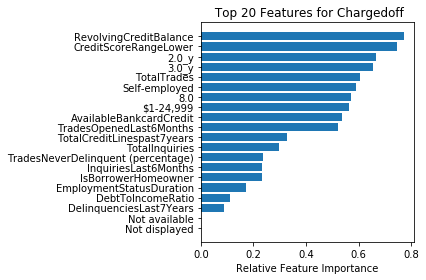

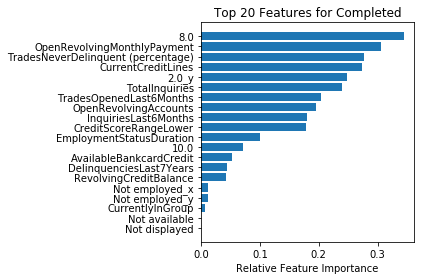

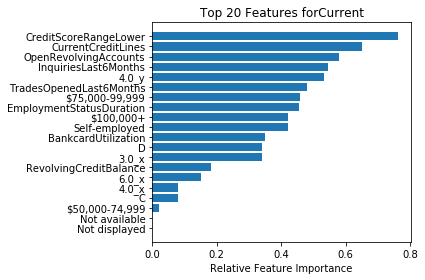

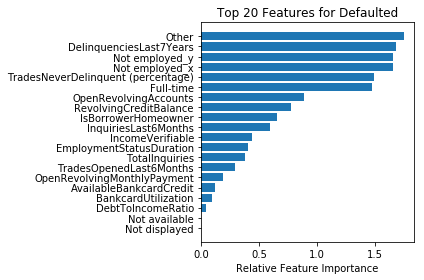

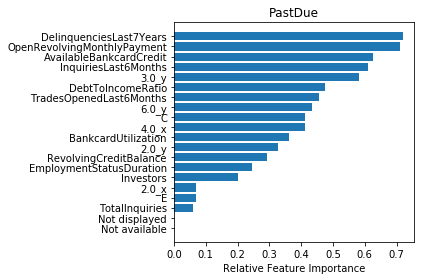

In [309]:
for i in range(5): 
    plot(number=i)

#### Intution and Anaylsis

These are the top 20 features the model uncovered for each Loan Status. To select our main features of analysis, we will use intition guided by these graphs: 

The first step is to analyze the graphs of importance, Chargedoff and Defaulted ,as these  results have the most business impact. For Chargedoff, the top three features are Revolving Credit Balance, and CreditScore, and Prosper ratings( numbers followed by y are specific ratings in this feature). I will not use revolving credit balance in my analysis, as this feature is not people specific but describes the banks financial state during this time. Furthermore, using my inutition, I believe features like Credit Balance, Deliquencies last 7 years,Public Records, etc. may be associated with different Loan Statuses but probably do not influence our feature of interest. For instance, a spike in delequencies may actually be caused by a rise in Past due loans. Therefore, because of this ambiguity, I will not analyze them. 

Looking at Defaulted we find Not employed and Full time as important variables. Therefore, I will further analyze EmploymentStatus. Also, we see a lot of variables like , Credit Balance, TradesneverDeliquent, etc. that I will ignore due to ambiguity of the direction of the association. 

Now, I will observe the other two graphs to unearth more features to analyse. From Current, I think it would be benificial to look into Income Category as we see it has a heavy presence. From Past Due, I will look into the Debt to Income ratio as this may have an impact on a persons financial stability and thus ability to pay. 

Thus, for my analysis I will largely focus on Credit Score, Prosper Rating(numeric), Employment Status, Income Range, and Debt to Income Ratio. 


### What is the structure of your dataset?

> This data set contains 81 features about loan data for 113936 listings. The features describe the loan, person getting the loan, and provides info about the financial state. 

### What is/are the main feature(s) of interest in your dataset?

> My main feature of interest is Loan Status. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> For my analysis I will largely focus on Credit Score, Prosper Rating(numeric), Empoyment Status, Income Range, and Debt to Income Ratio.

## Univariate Exploration

.

### Loan Status

In [30]:
# get counts of different loan statuses 
counts=cleaned["LoanStatus"].value_counts().reset_index()
counts.head()


,index,LoanStatus
0,Current,56576
1,Completed,19689
2,Chargedoff,5338
3,PastDue,2067
4,Defaulted,1006


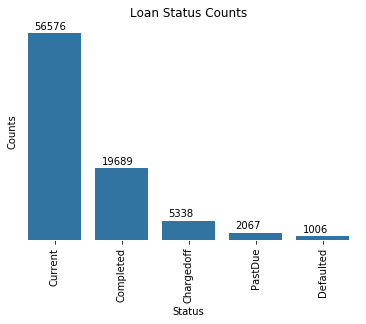

In [31]:
fig, ax = plt.subplots()
base_color = sb.color_palette()[0]
cat_order = cleaned['LoanStatus'].value_counts().index
sb.barplot(data=counts, x='index', y='LoanStatus', color= base_color, order= cat_order)
plt.xticks(rotation=90);
plt.yticks([])
plt.ylabel("Counts")
plt.xlabel("Status")
for i, v in enumerate(counts["LoanStatus"]): # puts number on top of bar
    plt.text(x=i-.3 ,y=v+1000, s=str(v), color='black',)


ax.spines['bottom'].set_color("white") 
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
plt.title("Loan Status Counts");

As you can see, there is significally more current loans in this dataset. Also, we notice that Chargedoff, PastDue and Defaulted seem to be be a non frequent occurance. 

### Prosper Rating

In [310]:
counts=cleaned["ProsperRating (numeric)"].value_counts().reset_index()
counts

,index,ProsperRating (numeric)
0,4.0,18307
1,5.0,15542
2,6.0,14517
3,3.0,14246
4,2.0,9763
5,1.0,6914
6,7.0,5359


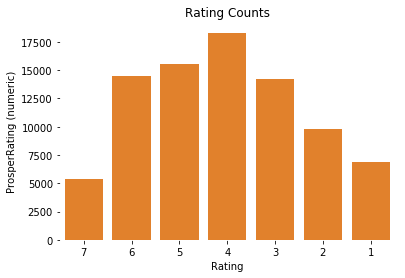

In [312]:
fig, ax = plt.subplots()
base_color = sb.color_palette()[1]
cat_order = [7,6,5,4,3,2,1]
sb.barplot(data=counts, y='ProsperRating (numeric)', x='index', color= base_color, order= cat_order)

plt.xlabel("Rating")



ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
plt.title("Rating Counts");

The ratings are organized from best to worst. As you can see the distribution peeks in the average ratings, and is fewer in the extremes, which is to be expected.

### Income Range

In [131]:
counts=cleaned["IncomeRange"].value_counts().reset_index()
counts

,index,IncomeRange
0,"$50,000-74,999",25638
1,"$25,000-49,999",24184
2,"$100,000+",15209
3,"$75,000-99,999",14499
4,"$1-24,999",4657
5,Not employed,649
6,$0,45
7,Not displayed,0


In [142]:
# Do not include 0 and Not Displayed as they are too infrequent
counts=counts[counts["IncomeRange"]>100]


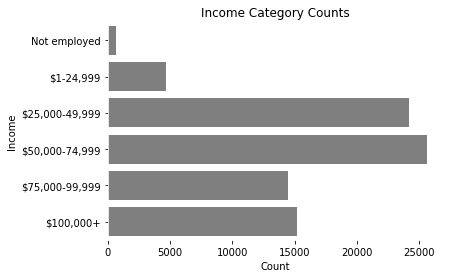

In [154]:
fig, ax = plt.subplots()
base_color = sb.color_palette()[7]
cat_order = ["Not employed","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]
sb.barplot(data=counts, y='index', x='IncomeRange', color= base_color,order=cat_order)
plt.xticks()
plt.xlabel("Count")
plt.ylabel("Income")


ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
plt.title("Income Category Counts");

This income distribution followed expectation, as it would be unusual to see many people with a reletivly high or low income. This indicates that Prosper is used by a good distrubiton of people and isn't a niche company.

### Employment Status

In [26]:
counts=cleaned["EmploymentStatus"].value_counts().reset_index()
counts

,index,EmploymentStatus
0,Employed,67133
1,Full-time,7944
2,Self-employed,4528
3,Other,3798
4,Not employed,649
5,Retired,368
6,Part-time,256
7,Not available,0


In [27]:
# Do not include not avaliable
counts=counts[counts["EmploymentStatus"]>100]

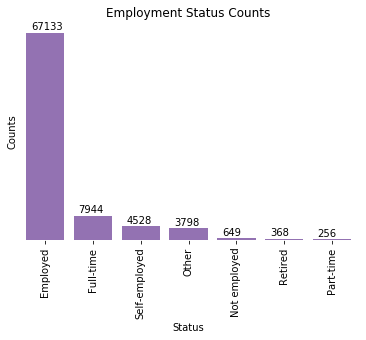

In [28]:
fig, ax = plt.subplots()
base_color = sb.color_palette()[4]
cat_order = counts["index"]
sb.barplot(data=counts, y='EmploymentStatus', x='index', color= base_color, order= cat_order)
plt.xticks(rotation=90)
plt.xlabel("Status")
plt.yticks([])
plt.ylabel("Counts")
for i, v in enumerate(counts["EmploymentStatus"]):
    plt.text(x=i-0.3 ,y=v+1000, s=str(v), color='black',)


ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
plt.title("Employment Status Counts");

This is to be expected as most people in the country are employed. The low Full time count is alarming as this should be higher. This may be caused by a failure of customers to report complete information. 

### Credit Score

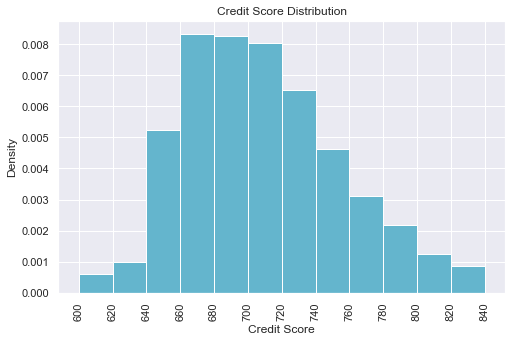

In [76]:
fig, ax = plt.subplots(figsize = [8, 5])
bins= np.arange(600,860,20)
plt.hist(cleaned["CreditScoreRangeLower"], color= "c", bins= bins, density=True);
plt.xticks(np.arange(600,860,20), rotation=90);
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
plt.title("Credit Score Distribution");
plt.xlabel("Credit Score");
plt.ylabel("Density");

This distribution is slightly right skewed.  I decided to limit the range to 860 to emphasize the main distribution of Credit Scores. However, this distrubution is to be expected.

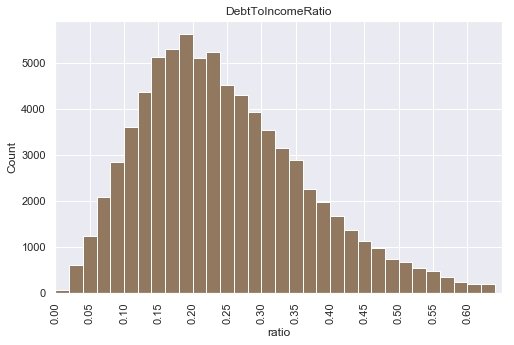

In [74]:
fig, ax = plt.subplots(figsize = [8, 5])
bins= np.arange(0,.65,.02)
plt.hist((cleaned["DebtToIncomeRatio"]), bins=bins, color= "C5", density=False);
plt.xlim(0,.65)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
plt.title("DebtToIncomeRatio");
plt.xlabel("ratio");
plt.ylabel("Count");
plt.xticks(np.arange(0,.65,.05), rotation=90);

The  graph of debt to income ratio is heavily skewed right. While most of the values are between 0.1, and 0.3. the debt to income ratios go on up to a max ratio of 10. The heavy presence of outliers is a major concern as it reduced the quality of the visuals. To correct this, I imposed a limit ratio of 0.65. However, the outliers were still numerous. Thus, I  did a square root transformation to make the distribution more normal. 

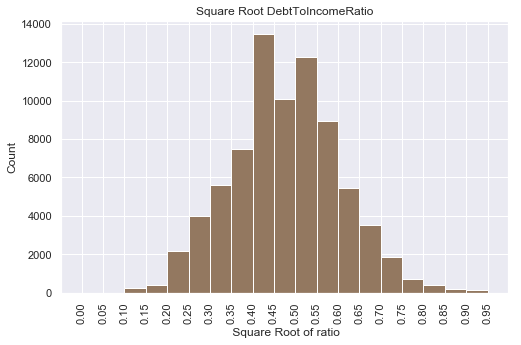

In [75]:
# scuare root transforation graph
fig, ax = plt.subplots(figsize = [8, 5])
bins= np.arange(0,1,.05)
plt.hist(np.sqrt(cleaned["DebtToIncomeRatio"]),  color= "C5", bins= bins, density=False);
#plt.xlim(0,.65)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
plt.title("Square Root DebtToIncomeRatio");
plt.xlabel(" Square Root of ratio");
plt.ylabel("Count");
plt.xticks(np.arange(0,1,.05), rotation=90);

The distribution is much more normal. 

In [59]:
cleaned["sqrt"]= np.sqrt(cleaned["DebtToIncomeRatio"])

In [46]:
cleaned.describe()[["DebtToIncomeRatio","CreditScoreRangeLower", "sqrt"]]

,DebtToIncomeRatio,CreditScoreRangeLower,sqrt
count,77395.000000,84676.000000,77395.000000
mean,0.258816,699.387548,0.483384
std,0.318634,47.099595,0.158604
min,0.000000,600.000000,0.000000
25%,0.150000,660.000000,0.387298
50%,0.220000,700.000000,0.469042
75%,0.320000,720.000000,0.565685
max,10.010000,880.000000,3.163858


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  For our variable of interest, we find that there is a heavy presence of current loan type, and not that many chargedoffs and defaults. This is to be expected.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For income and proser rating, the distribution peaks for the middle value/range. Both the credit score and debt to income ratios are right skewed. To make the graphs more readably, I imposed a x range, and used a square root transformation for the Debt to Income Ratio.I was suprised how right skewed the debt to income ratio variable was. I had to perform a square root transformation, as the excesive presence of outliers would makke the graphs for bivariate analysis with loan Status unreadable. 

## Bivariate Exploration



### Prosper Rating and Loan Status

In [47]:
# get  counst for each rating
counts=cleaned["ProsperRating (numeric)"].value_counts()

In [162]:
counts

4.0    18307
5.0    15542
6.0    14517
3.0    14246
2.0     9763
1.0     6914
7.0     5359
Name: ProsperRating (numeric), dtype: int64

In [48]:
# get counts for each rating grouped by loan Status type
grouped=cleaned.groupby(["ProsperRating (numeric)","LoanStatus"]).size().reset_index()
grouped.head()

,ProsperRating (numeric),LoanStatus,0
0,1.0,Chargedoff,1215
1,1.0,Completed,2301
2,1.0,Current,2900
3,1.0,Defaulted,209
4,1.0,PastDue,289


Instead of graphing counts, I decided to graph the ratio of values in a specific LoanStatus/prosperRating group when compared to the whole individual rating count. Additionally, I also converted to percentages. I did this to better unearth trends. For instance, without this method, it would be difficult to determine whether a trend occured due to there simply being more values in that total group or due to a important reason. 

In [49]:
# Get the counts from the counts table for the corresponding position in the group table and then calculate percentage
c=[]
for i in grouped['ProsperRating (numeric)']: 
                c.append(counts[int(i)])
    

In [50]:
percentage= (grouped[0]/c)*100
grouped["percentage"]= percentage
grouped.head()

,ProsperRating (numeric),LoanStatus,0,percentage
0,1.0,Chargedoff,1215,17.573040
1,1.0,Completed,2301,33.280301
2,1.0,Current,2900,41.943882
3,1.0,Defaulted,209,3.022852
4,1.0,PastDue,289,4.179925


 Because of the large presence of Current loans, it may make other statuses hard to detect due to a larger axis. Therefore, I will create a graph without Current. 

In [51]:
# Find location of current and drop
drop=np.where(grouped["LoanStatus"]=="Current")[0]
drop

array([ 2,  7, 12, 17, 22, 27, 32], dtype=int64)

In [52]:
without=grouped.drop(drop)

In [53]:
without["LoanStatus"]= without["LoanStatus"].astype("object")

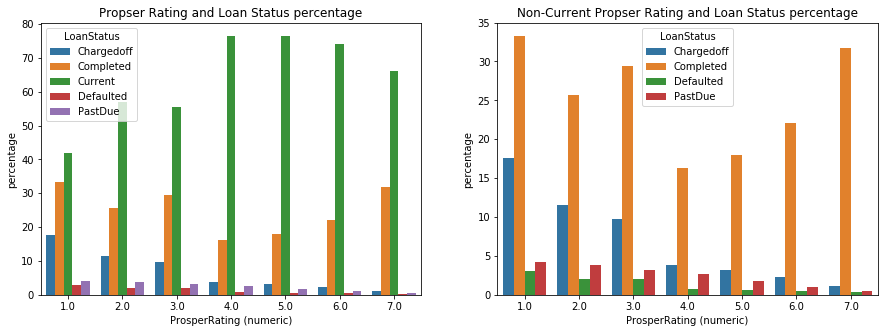

In [54]:
# Graph
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sb.barplot(data = grouped, x = 'ProsperRating (numeric)',y="percentage" ,hue = 'LoanStatus');
plt.title("Propser Rating and Loan Status percentage")
plt.subplot(1, 2, 2)
sb.barplot(data = without, x = 'ProsperRating (numeric)',y="percentage" ,hue = 'LoanStatus')
plt.title("Non-Current Propser Rating and Loan Status percentage");

Looking at the First Graph we find that a majority of Loans with a proser Rating of 2 and up are current, with a large spike from rating 2 to 3. Also, looking at the non current loans, we finds that there is a steady and noticible decline in percentage Chargedoff as the rating increases. We also witness this trend for the Defaulted and Past Due, but it is less noticable. Furthrmore, it is interesting t see that completed as its to largest values on the extremes. This could indicate that a low and high rating is very significant to the process. Or, it could be due to randomness and actually be a one time result. 

### Income Range and Loan Status

In [55]:
counts=pd.DataFrame(cleaned["IncomeRange"].value_counts())
counts

,IncomeRange
"$50,000-74,999",25574
"$25,000-49,999",24135
"$100,000+",15157
"$75,000-99,999",14473
"$1-24,999",4643
Not employed,649
$0,45
Not displayed,0


In [56]:
# DO not include $0 and Not displayed as they are too infrequent
counts=counts[counts["IncomeRange"]>100]

In [137]:
counts

,IncomeRange
"$50,000-74,999",25574
"$25,000-49,999",24135
"$100,000+",15157
"$75,000-99,999",14473
"$1-24,999",4643
Not employed,649


In [57]:
# Repeating the groupy and creating percentage steps like in the previous plot
grouped=cleaned.groupby(["IncomeRange","LoanStatus"]).size().reset_index()
x=np.where(grouped["IncomeRange"]=="$0")[0]
grouped=grouped.drop(x)
grouped.head()

,IncomeRange,LoanStatus,0
5,"$1-24,999",Chargedoff,613
6,"$1-24,999",Completed,1250
7,"$1-24,999",Current,2536
8,"$1-24,999",Defaulted,91
9,"$1-24,999",PastDue,153


In [58]:
c=[]
for i in grouped['IncomeRange']: 
                c.append(counts.loc[i][0])
percentage= (grouped[0]/c)*100
grouped["percentage"]= percentage
grouped.head()

,IncomeRange,LoanStatus,0,percentage
5,"$1-24,999",Chargedoff,613,13.202671
6,"$1-24,999",Completed,1250,26.922249
7,"$1-24,999",Current,2536,54.619858
8,"$1-24,999",Defaulted,91,1.959940
9,"$1-24,999",PastDue,153,3.295283


In [59]:
grouped["IncomeRange"]=grouped["IncomeRange"].astype("object")

In [60]:
grouped=grouped.reset_index().drop("index", axis=1)

In [61]:
# creating the non current data frame
drop=np.where(grouped["LoanStatus"]=="Current")[0]
without=grouped.drop(drop)
without["LoanStatus"]= without["LoanStatus"].astype("object")

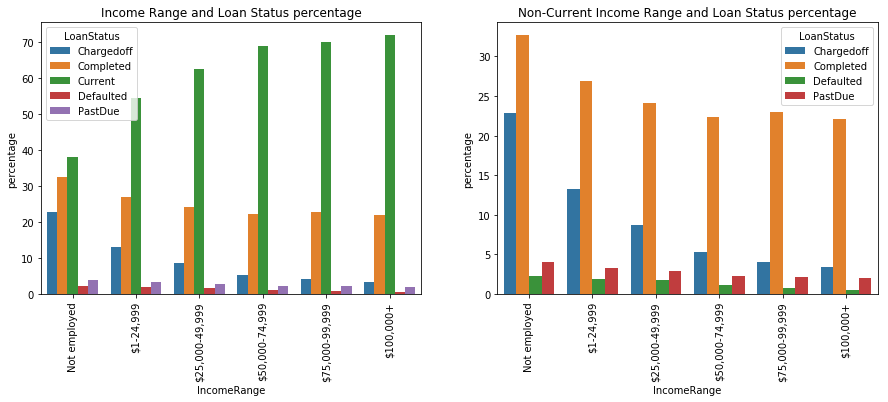

In [62]:
order=["Not employed","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sb.barplot(data = grouped, x = "IncomeRange",y="percentage" ,hue = 'LoanStatus', order= order);
plt.title("Income Range and Loan Status percentage")
plt.xticks(rotation=90);
plt.subplot(1, 2, 2)
sb.barplot(data = without, x = "IncomeRange",y="percentage" ,hue = 'LoanStatus', order= order)
plt.title("Non-Current Income Range and Loan Status percentage");
plt.xticks(rotation=90);

Chargedoff Defaulted and past due all decrease with an increase with income, even though this trend looks very small for defaulted and past due. It is interesting to see that completed percentage decreases and then stagnates. This contradicts the trend from the first bi variate analysis which showed peaks at the extremes as that previous trend would indicate peaks at Not employed and 100,000+. It is intesting to see that Current increased with Income Range. This could indicate that higher incomes take more long term loans and thus need more time to pay off debts. 

### Employment Status and Loan Status

In [63]:
# get Counts and drop too infreqent values
counts=pd.DataFrame(cleaned["EmploymentStatus"].value_counts())
counts=counts[counts["EmploymentStatus"]>100]

In [202]:
counts

,EmploymentStatus
Employed,67133
Full-time,7944
Self-employed,4528
Other,3798
Not employed,649
Retired,368
Part-time,256


In [64]:
# get group by count
grouped=cleaned.groupby(["EmploymentStatus","LoanStatus"]).size().reset_index()
x=np.where(grouped["EmploymentStatus"]=="$0")[0]
grouped=grouped.drop(x)
grouped.head()

,EmploymentStatus,LoanStatus,0
0,Employed,Chargedoff,3529
1,Employed,Completed,12320
2,Employed,Current,48929
3,Employed,Defaulted,630
4,Employed,PastDue,1725


In [65]:
# get percentages
c=[]
for i in grouped['EmploymentStatus']: 
                c.append(counts.loc[i][0])
percentage= (grouped[0]/c)*100
grouped["percentage"]= percentage
grouped.head()

,EmploymentStatus,LoanStatus,0,percentage
0,Employed,Chargedoff,3529,5.256729
1,Employed,Completed,12320,18.351630
2,Employed,Current,48929,72.883679
3,Employed,Defaulted,630,0.938436
4,Employed,PastDue,1725,2.569526


In [66]:
grouped["EmploymentStatus"]=grouped["EmploymentStatus"].astype("object")

In [67]:
# Create pivt table for heat map
pivot=grouped.pivot(index='LoanStatus', columns="EmploymentStatus", values='percentage')
pivot

EmploymentStatus,Employed,Full-time,Not employed,Other,Part-time,Retired,Self-employed
LoanStatus,,,,,,,
Chargedoff,5.256729,11.102719,22.804314,7.767246,12.890625,16.032609,8.657244
Completed,18.351630,68.441591,32.665639,11.822012,72.656250,53.260870,19.633392
Current,72.883679,16.565962,38.212635,75.882043,9.375000,25.000000,68.131625
Defaulted,0.938436,2.995972,2.311248,1.421801,1.953125,4.076087,1.082155
PastDue,2.569526,0.893756,4.006163,3.106898,3.125000,1.630435,2.495583


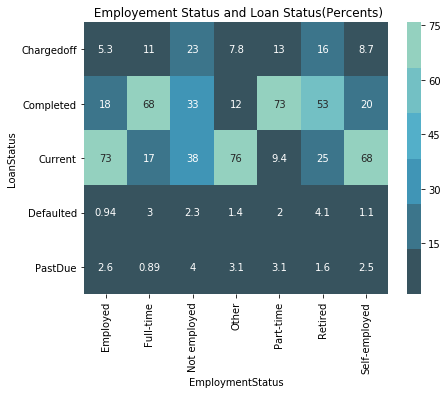

In [68]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sb.heatmap(pivot,annot = True, cmap=sb.color_palette("GnBu_d"));
plt.title(" Employement Status and Loan Status(Percents)"); 



For charedoff, the largest values are for Non employed and Retired workers. For completed,  the largest values are both part and full time workers. Defaulted and Past Due both have very low percentages without a clear pattern. Therefore, we can assume that Employment Status might not be the best predictor for these statuses. 

#### Credit Score and Loan Status

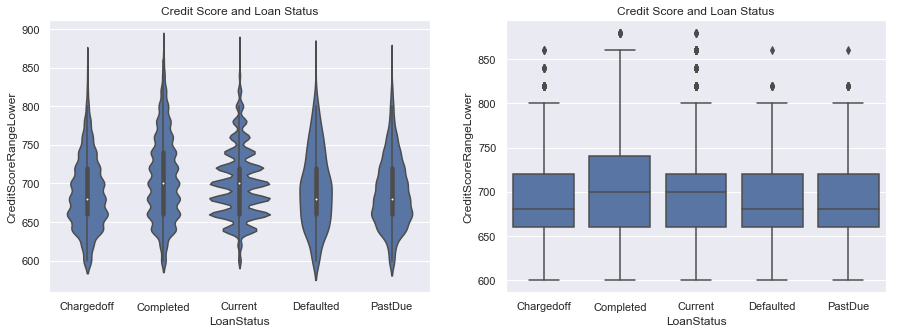

In [72]:
sb.set()
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.violinplot(data = cleaned, x = 'LoanStatus', y = "CreditScoreRangeLower", color = base_color);
plt.title("Credit Score and Loan Status");
plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = cleaned, x = 'LoanStatus', y = "CreditScoreRangeLower", color = base_color);
plt.title("Credit Score and Loan Status") ;             

For the violin plot, we notice that current has a bumpy plot, which indicated a high concentration quicly followed by a low concentration. We also notice that defaulted and pastdue have a smaller minimum value than the other groups. Also, past due seems to be wider than defaulted indicating more presence of low credit scores. Also, chargedoff has a similiar width than past due but has more riples indicating a slight rapid change in concentration. From, the box and whicker plot, we find that completed had a higher 75fth percentile than the others.

### Debt to Income and Loan Status 

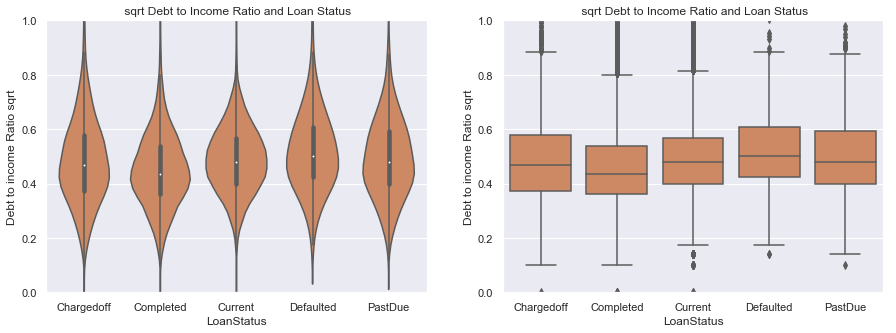

In [84]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[1]
sb.violinplot(data = cleaned, x = 'LoanStatus', y = "sqrt", color = base_color);
plt.title(" sqrt Debt to Income Ratio and Loan Status");
plt.ylim(0,1);
plt.ylabel("Debt to income Ratio sqrt");
plt.subplot(1, 2, 2)
base_color = sb.color_palette()[1]
sb.boxplot(data = cleaned, x = 'LoanStatus', y = "sqrt", color = base_color);
plt.title(" sqrt Debt to Income Ratio and Loan Status");
plt.ylim(0,1);
plt.ylabel("Debt to income Ratio sqrt");

These are plots of the square root. Because of the presence fo outliers, I had to set a y lim of 1.While the violin plot doesnt yield any udeful information, we find that the box and whisker splot shows small seperations between the groups. We notice that defaulted has a slightly higher square root debt to income ratio than the others. Past Due and Chargedoff seem too have a very similiar distribution while completed has the lowest ratio of the Statuses.  

### Debt to Income and Credit Score

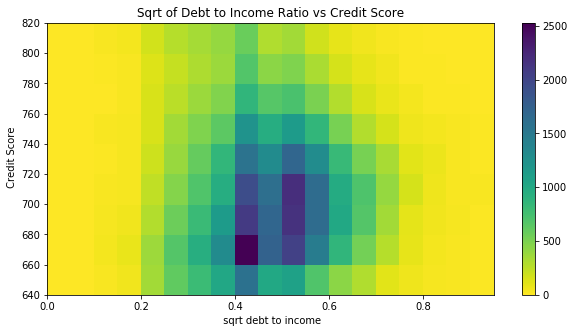

In [75]:
plt.figure(figsize=(10,5))
bins_y = np.arange(640, 840, 20)
bins_x = np.arange(0, 1, .05)
plt.hist2d(data = cleaned, x = "sqrt", y = "CreditScoreRangeLower",
           bins = [bins_x, bins_y], cmap = 'viridis_r')
plt.colorbar();
plt.title("Sqrt of Debt to Income Ratio vs Credit Score");
plt.xlabel(" sqrt debt to income");
plt.ylabel(" Credit Score");

It is clear that there is significant overlap in the middle of the heatmap. These intersection points were  are also the most common values for debt to income and credit score individually. The fact that the two distributions are merging like this could indicate a corelation and relationship between the variables. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature of interest vary with other features in the dataset?

> For Prosper Rating, and Income we noticed that Chargedoff, Defaulted, and Past Due all decreased with an increase in value. However, the decrease for chargedoff was more apparent. Employment Status showed that Retired and Unemployed are more likely to be Chargedoff. Credit Score showed us that a completed loan has very high credit scores. Also, the Debt to Income Ratio was able to show that Defaulted have a slightly higher square root of debt to income ratio. Current showed an increase with income range which could indicate that higher income people take out longer loans. 

### Did you observe any interesting relationships between the other features (not the main feature of interest)?

> It seems that that sqrt debt to income and credit score follow similiar distributions. This is because the peaks of the distribution both intersect as shown by the concentration of the heatmap. 

## Multivariate Exploration


### Reletationship between Creation Year, LoanStatus, and Credit Score

In [141]:
# get creation year
cleaned["creation_year"]=cleaned["ListingCreationDate"].dt.year


In [142]:
# group by and get average credit score
group1=pd.DataFrame(cleaned.groupby(["creation_year", "LoanStatus" ]).mean()).reset_index()[["creation_year","LoanStatus","CreditScoreRangeLower"]]
group1.head()

,creation_year,LoanStatus,CreditScoreRangeLower
0,2009,Chargedoff,658.913043
1,2009,Completed,692.375691
2,2009,Current,NaN
3,2009,Defaulted,656.315789
4,2009,PastDue,NaN


In [148]:
# drop current and places with missing values
drop=np.where(group1["LoanStatus"]=="Current")[0]
group1=group1.drop(drop)
group1=group1.reset_index().drop("index", axis=1)
group1=group1.dropna()
group1

,creation_year,LoanStatus,CreditScoreRangeLower
0,2009,Chargedoff,658.913043
1,2009,Completed,692.375691
2,2009,Defaulted,656.315789
3,2010,Chargedoff,661.837838
4,2010,Completed,691.988756
5,2010,Defaulted,661.951220
6,2011,Chargedoff,657.380353
7,2011,Completed,691.405622
8,2011,Defaulted,663.877551
9,2012,Chargedoff,656.933045


In [151]:
# Only have 3 availabe loan Statuses for 2009-20013
group1=group1.drop(15)

In [152]:
group1["LoanStatus"]=group1["LoanStatus"].astype("object")

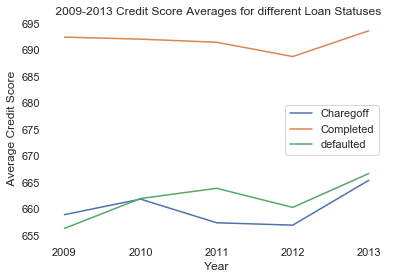

In [172]:
fig, ax = plt.subplots()
sb.set_style("white")
x= np.unique(group1["creation_year"])
chargeoff=group1["CreditScoreRangeLower"][np.where(group1["LoanStatus"]=="Chargedoff")[0]].values
completed=group1["CreditScoreRangeLower"][np.where(group1["LoanStatus"]=="Completed")[0]].values
defaulted=group1["CreditScoreRangeLower"][np.where(group1["LoanStatus"]=="Defaulted")[0]].values
plt.plot(x,chargeoff)
plt.plot(x,completed)
plt.plot(x,defaulted)
plt.xticks(x);
plt.legend(['Charegoff', "Completed","defaulted"])
plt.ylabel(" Average Credit Score");
plt.xlabel("Year");
plt.title(" 2009-2013 Credit Score Averages for different Loan Statuses");
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

From this graph, it is apparent that Completed has had larger Credit Score that Chargeoff or defaulted. Also, we notice that average credit score for defaulted has risen from 2009-2011 and from 2012-2013. However for Chargeoff it initially increased, then decreased, and increased from 2012 to 2013. From 2012 to 2013, all three increased, but all these changes are small. 

### Relationship between Homeownership, Prosper Rating and Credit Score

C:\Users\Pavan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


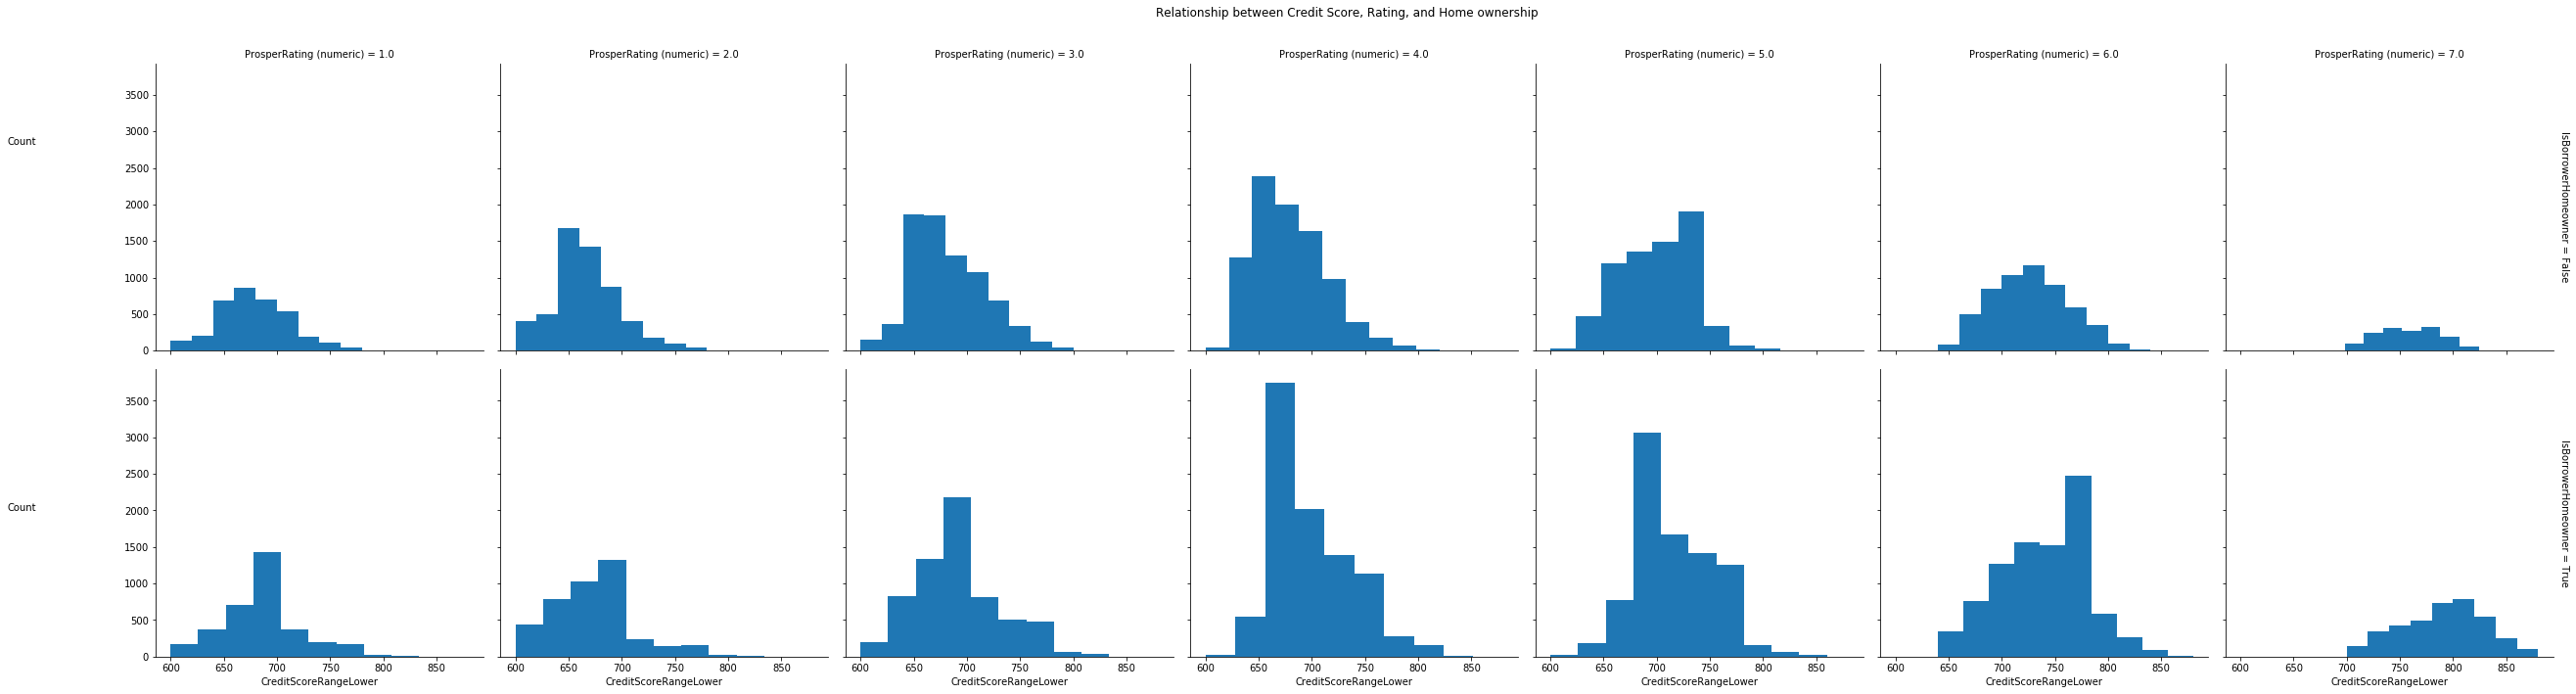

In [96]:
g = sb.FacetGrid(data = cleaned, col = 'ProsperRating (numeric)', row="IsBorrowerHomeowner" ,size = 5,
                margin_titles = True)
g.map(plt.hist,"CreditScoreRangeLower")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Credit Score, Rating, and Home ownership');
plt.text(x=-1500,y=7000,s="Count");
plt.text(x=-1500,y=2000,s="Count");

For both these home ownerhsip rows, we can see credit score gradually shift to the right as the prosper Rating increases. This is obesevred by the largest bar. However, for Prosper rating 4 there is a large uptick in low rather low rating space. In fact the peaks seem to decrease in credit score from 3 to 4 for both rows. Thus while there is a generally trend it is steady for each prosper rating. Also, there is no significant differences of trend between the rows indicating that homeowner does not have a strong relationship with credit score and Prosper Rating. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Credit Score Strengthened as it seems like a good distinguisher between completed and default/chargedoff loans. I wasn't able to notice any significant relationships between homeownership prosper Rating and Credit Score.  

### Were there any interesting or surprising interactions between features?

> I thought a lack of home ownerhsip would play more of role in impacted the distribution. Also, it is suprising to see that the average credit score for defaulted/ chargeddoff loans had actually increased slighly from 2009-2013. 